# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC

# Read the CSV file and Display data

In [37]:
dataset = pd.read_csv("crop_csv_file.csv")
dataset.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,humidity,soil moisture,area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,34,45,52,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,34,55,62,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,35,50,59,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,25,55,55,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,36,35,45,40.0,169.0


# Describe the data

In [3]:
dataset.describe()

,Crop_Year,Temperature,humidity,soil moisture,area,Production
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.978400e+04
mean,2005.879138,34.445489,44.776116,53.110502,7363.389469,4.132019e+05
std,5.106092,3.498524,6.662406,5.258764,27927.935789,1.232609e+07
min,1997.000000,25.000000,35.000000,45.000000,0.200000,0.000000e+00
25%,2002.000000,34.000000,40.000000,50.000000,76.000000,8.700000e+01
50%,2006.000000,36.000000,42.000000,54.000000,436.000000,6.384400e+02
75%,2010.000000,36.000000,50.000000,55.000000,2546.500000,5.615000e+03
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,7.801620e+08


# Check the shape of data

In [4]:
dataset.shape

(49999, 10)

# Check NaN values

In [38]:
dataset.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Temperature        0
humidity           0
soil moisture      0
 area              0
Production       215
dtype: int64

# Drop column

In [39]:
df=dataset.drop(['Crop_Year'], axis = 1)

# Check the shape

In [40]:
df.shape

(49999, 9)

# Drop missing values

In [41]:
df=df.dropna()

# Recheck if any missing value exist

In [42]:
df.isnull().sum()

State_Name       0
District_Name    0
Season           0
Crop             0
Temperature      0
humidity         0
soil moisture    0
 area            0
Production       0
dtype: int64

# Checking the count of categories

In [43]:
df['Season'].value_counts()

Kharif         16934
Rabi           15586
Whole Year     12602
Summer          2107
Autumn          1427
Winter          1128
Name: Season, dtype: int64

In [44]:
df['Crop'].value_counts()

Rice                 3851
Maize                3248
Moong(Green Gram)    2074
Dry chillies         1593
Arhar/Tur            1576
                     ... 
Grapes                 17
Varagu                 13
Peas  (vegetable)       3
other fibres            2
Guar seed               1
Name: Crop, Length: 80, dtype: int64

In [45]:
df['District_Name'].value_counts()

KURNOOL                     824
KADAPA                      817
VISAKHAPATANAM              809
PRAKASAM                    802
ANANTAPUR                   784
                           ... 
NICOBARS                     77
SOUTH ANDAMANS               74
NORTH AND MIDDLE ANDAMAN     50
LONGDING                     13
NAMSAI                        1
Name: District_Name, Length: 112, dtype: int64

In [46]:
df['State_Name'].value_counts()

Bihar                          18874
Assam                          14622
Andhra Pradesh                  9561
Chhattisgarh                    3892
Arunachal Pradesh               2545
Andaman and Nicobar Islands      201
Chandigarh                        89
Name: State_Name, dtype: int64

In [47]:
df.shape

(49784, 9)

# Label Encoding

In [48]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

State_Name=label_encoder.fit_transform(df.State_Name)
District_Name=label_encoder.fit_transform(df.District_Name)
Crop=label_encoder.fit_transform(df.Crop)
Season=label_encoder.fit_transform(df.Season)

df['State_Name']=State_Name
df['District_Name']=District_Name
df['Crop']=Crop
df['Season']=Season

In [49]:
df.shape

(49784, 9)

In [50]:
df

,State_Name,District_Name,Season,Crop,Temperature,humidity,soil moisture,area,Production
0,0,78,1,0,36,35,45,1254.0,2000.0
1,0,78,1,46,37,40,46,2.0,1.0
2,0,78,1,59,36,41,50,102.0,321.0
3,0,78,4,3,37,42,55,176.0,641.0
4,0,78,4,12,36,40,54,720.0,165.0
...,...,...,...,...,...,...,...,...,...
49994,6,46,1,65,36,35,45,27.0,7.0
49995,6,46,1,66,37,40,46,27.0,32.0
49996,6,46,1,68,36,41,50,450.0,213.0
49997,6,46,1,74,37,42,55,1778.0,309.0


# Define x and Y

In [51]:
x= df.iloc[:,:-1] 

y = df.iloc[:,-1]

# Test Train Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Build the Modles

# Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor
drm=DecisionTreeRegressor()
drm.fit(X_train, y_train)
y_pred = drm.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
r1= r2_score(y_test,y_pred)
print("R2score for DecisionTree Regressor  is",r1 )

R2score for DecisionTree Regressor  is 0.9389669897033192


# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("R2score for Linear Regressor  is",r2 )

R2score for Linear Regressor  is 0.005327600720201109


# Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=7,criterion='squared_error',random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [58]:
from sklearn.metrics import r2_score
r3= r2_score(y_test,y_pred)
print("R2score for RandomForest Regressor  is",r3 )

R2score for RandomForest Regressor  is 0.9536071981492987


# K Nearest Neighbours

In [20]:
from sklearn.neighbors import KNeighborsRegressor
classifier=KNeighborsRegressor(n_neighbors=1)
classifier.fit(x,y)
y_predict=classifier.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
r4= r2_score(y_test,y_predict)
print("R2score for KNN Regressor  is",r4 )

R2score for KNN Regressor  is 0.9999576642600354


# Naive bayes

In [22]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(x,y)
y_pred=br.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
r5= r2_score(y_test,y_predict)
print("R2score for BayesianRidge Regressor  is",r5 )

R2score for BayesianRidge Regressor  is 0.9999576642600354


# Gradient Boosting Regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=50,max_depth=1,random_state=0)
gbr.fit(x,y)
y_pred=gbr.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
r6= r2_score(y_test,y_predict)
print("R2score for Gradient Boosting Regressor  is",r6 )

R2score for Gradient Boosting Regressor  is 0.9999576642600354


# XGboost Regressor

In [26]:
import xgboost as xg
xgb_r=xg.XGBRegressor(objective='reg:squarederror',n_estimators=10,seed=123)
xgb_r.fit(x,y)
y_pred=xgb_r.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
r7= r2_score(y_test,y_predict)
print("R2score for Gradient Boosting Regressor  is",r7 )

R2score for Gradient Boosting Regressor  is 0.9999576642600354


In [28]:
print("Accuracy for Decision Tree: ",r1)
print("\n\n")
print("Accuracy for Linear Regresion: ",r2)
print("\n\n")
print("Accuracy for Random Forest: ",r3)
print("\n\n")
print("Accuracy for Gradient Boosting Method: ",r6)
print("\n\n")


Accuracy for Decision Tree:  0.9389669897033192



Accuracy for Linear Regresion:  0.005327600720201109



Accuracy for Random Forest:  0.9536071981492987



Accuracy for Gradient Boosting Method:  0.9999576642600354





In [29]:
x=['Decision Tree Regressor','Linear Regression','Random Forest Regressor','Gradient boost ']
yacc=[r1,r2,r3,r6]


In [30]:
data = {'Algorithms':x,
        'Accuracy':yacc,
        }

In [31]:
df_acc=pd.DataFrame(data)
df_acc.head(5)

,Algorithms,Accuracy
0,Decision Tree Regressor,0.938967
1,Linear Regression,0.005328
2,Random Forest Regressor,0.953607
3,Gradient boost,0.999958


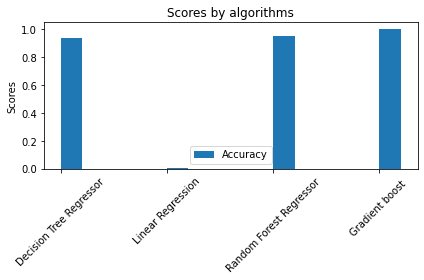

In [32]:
import numpy as np
labels = df_acc['Algorithms']
acc = df_acc['Accuracy']


x = np.arange(len(labels))  # the label locations
w = 0.6
dimw = w / 3
fig, ax = plt.subplots()
rects1 = ax.bar(x+1*dimw, acc, dimw, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by algorithms')
ax.set_xticks(x + dimw / 2)
ax.set_xticklabels(labels,rotation = 45)
ax.legend()

fig.tight_layout()

plt.show()

In [66]:
State =input('Enter state Name:')
District=input('Enter District Name :')
Season=input('Enter Season:')
Crop=input('Enter crop:')
Temperature=input('Enter Temperature:')
Humidity=input('Enter Humidity:')
Soil_Moisture=input('Enter Soil Moisture:')
Area=input('Enter area:')

Output=classifier.predict([[
          
                   float(State),
                   float(District),
                   float(Season),
                   float(Crop),
                   float(Temperature),
                   float(Humidity),
                   float(Soil_Moisture),
                   float(Area)
                   ]])
print(Output)
print('Crop yeild prediction :',Output)

Enter state Name:0
Enter District Name :78
Enter Season:1
Enter crop:59
Enter Temperature:36
Enter Humidity:41
Enter Soil Moisture:50
Enter area:102
[321.]
Crop yeild prediction : [321.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
